In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)
!pip install tflearn

TensorFlow 1.x selected.
1.15.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np        
import os                  
from random import shuffle 
import glob
import cv2


path = r'/content/drive/MyDrive/Tốt nghiệp/FOOD/'
IMG_SIZE = 400
LR = 1e-3
MODEL_NAME = 'Fruits_dectector-{}-{}.h5'.format(LR, '5conv-basic')
no_of_fruits=7
percentage=0.2
no_of_images=100

In [3]:
def create_train_data(path):
    training_data = []
    folders=os.listdir(path)[0:no_of_fruits]
    for i in range(len(folders)):
        label = [0 for i in range(no_of_fruits)]
        label[i] = 1
        #print(folders[i])
        k=0
        for j in glob.glob(path+"/"+folders[i]+"/*/*.*"):    
            print(j)        
            if(k==no_of_images):
                break
            k=k+1
            img = cv2.imread(j)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            training_data.append([np.array(img),np.array(label)])
            #print(np.array(label))
    shuffle(training_data)
    return training_data,folders

training_data,labels=create_train_data(path)

/content/drive/MyDrive/Tốt nghiệp/FOOD//Orange/1-Samsung-S4-Light Environment/1 (25).jpg
/content/drive/MyDrive/Tốt nghiệp/FOOD//Orange/1-Samsung-S4-Light Environment/1 (30).jpg
/content/drive/MyDrive/Tốt nghiệp/FOOD//Orange/1-Samsung-S4-Light Environment/1 (27).jpg
/content/drive/MyDrive/Tốt nghiệp/FOOD//Orange/1-Samsung-S4-Light Environment/1 (21).jpg
/content/drive/MyDrive/Tốt nghiệp/FOOD//Orange/1-Samsung-S4-Light Environment/1 (31).jpg
/content/drive/MyDrive/Tốt nghiệp/FOOD//Orange/1-Samsung-S4-Light Environment/1 (26).jpg
/content/drive/MyDrive/Tốt nghiệp/FOOD//Orange/1-Samsung-S4-Light Environment/1 (24).jpg
/content/drive/MyDrive/Tốt nghiệp/FOOD//Orange/1-Samsung-S4-Light Environment/1 (28).jpg
/content/drive/MyDrive/Tốt nghiệp/FOOD//Orange/1-Samsung-S4-Light Environment/1 (29).jpg
/content/drive/MyDrive/Tốt nghiệp/FOOD//Orange/1-Samsung-S4-Light Environment/1 (23).jpg
/content/drive/MyDrive/Tốt nghiệp/FOOD//Orange/1-Samsung-S4-Light 

In [4]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tensorflow as tf

def get_model(IMG_SIZE,no_of_fruits,LR):
	try:
		tf.reset_default_graph()
	except:
		print("tensorflow")
	convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 3], name='input')

	convnet = conv_2d(convnet, 32, 5, activation='relu')

	convnet = max_pool_2d(convnet, 5)

	convnet = conv_2d(convnet, 64, 5, activation='relu')

	convnet = max_pool_2d(convnet, 5)

	convnet = conv_2d(convnet, 128, 5, activation='relu')
	convnet = max_pool_2d(convnet, 5)

	convnet = conv_2d(convnet, 64, 5, activation='relu')
	convnet = max_pool_2d(convnet, 5)


	convnet = conv_2d(convnet, 32, 5, activation='relu')
	convnet = max_pool_2d(convnet, 5)

	convnet = fully_connected(convnet, 1024, activation='relu')
	convnet = dropout(convnet, 0.8)

	convnet = fully_connected(convnet, no_of_fruits, activation='softmax')
	convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

	model = tflearn.DNN(convnet, tensorboard_dir='log')

	return model

In [5]:
size=int(len(training_data)*percentage)
print(size)
train = training_data[:-size]
test=training_data[-size:]
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = [i[1] for i in train]
test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_y = [i[1] for i in test]
model=get_model(IMG_SIZE,no_of_fruits,LR)

model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': test_x},
                                                                    {'targets': test_y}), 
    snapshot_step=10000, show_metric=True, run_id=MODEL_NAME)

model_save_at=os.path.join("model",MODEL_NAME)
model.save(model_save_at)

Training Step: 89  | total loss: 0.22960 | time: 1.463s
| Adam | epoch: 010 | loss: 0.22960 - acc: 0.9395 -- iter: 512/556
Training Step: 90  | total loss: 0.24228 | time: 2.601s
| Adam | epoch: 010 | loss: 0.24228 - acc: 0.9296 | val_loss: 0.35928 - val_acc: 0.8993 -- iter: 556/556
--
INFO:tensorflow:/content/model/Fruits_dectector-0.001-5conv-basic.h5 is not in all_model_checkpoint_paths. Manually adding it.


In [6]:
import cv2
import numpy as np
import os

def getAreaOfFood(img1):
    data=os.path.join(os.getcwd(),"images")
    if os.path.exists(data):
        print('folder exist for images at ',data)
    else:
        os.mkdir(data)
        print('folder created for images at ',data)
        
    
    img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) # trả về hình ảnh xám 
    img_filt = cv2.medianBlur( img, 5) #làm mờ ảnh 
    img_th = cv2.adaptiveThreshold(img_filt,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,2)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) #


	# tìm đường viền. loại. và tìm đường bao lớn nhất. đường viền lớn nhất tương ứng với đĩa và quả.
    mask = np.zeros(img.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)#
    cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)#
    #cv2.imwrite('{}\\5 mask.jpg'.format(data),mask)
    img_bigcontour = cv2.bitwise_and(img1,img1,mask = mask)
    #cv2.imwrite('{}\\6 img_bigcontour.jpg'.format(data),img_bigcontour)

	# chuyển đổi sang hsv. ngưỡng otsu trong s để loại bỏ đĩa
    hsv_img = cv2.cvtColor(img_bigcontour, cv2.COLOR_BGR2HSV)
    cv2.imwrite('{}\\7 hsv_img.jpg'.format(data),hsv_img)
    h,s,v = cv2.split(hsv_img)
    mask_plate = cv2.inRange(hsv_img, np.array([0,0,50]), np.array([200,90,250]))
    cv2.imwrite('{}\\8 mask_plate.jpg'.format(data),mask_plate)
    mask_not_plate = cv2.bitwise_not(mask_plate)
    cv2.imwrite('{}\\9 mask_not_plate.jpg'.format(data),mask_not_plate)
    fruit_skin = cv2.bitwise_and(img_bigcontour,img_bigcontour,mask = mask_not_plate)
    cv2.imwrite('{}\\10 fruit_skin.jpg'.format(data),fruit_skin)

	# chuyển đổi sang hsv để phát hiện và loại bỏ các pixel vỏ trái cây
    hsv_img = cv2.cvtColor(fruit_skin, cv2.COLOR_BGR2HSV)
    cv2.imwrite('{}\\11 hsv_img.jpg'.format(data),hsv_img)
    skin = cv2.inRange(hsv_img, np.array([0,10,60]), np.array([10,160,255])) #Scalar(0, 10, 60), Scalar(20, 150, 255)
    cv2.imwrite('{}\\12 skin.jpg'.format(data),skin)
    not_skin = cv2.bitwise_not(skin); #invert skin and black
    cv2.imwrite('{}\\13 not_skin.jpg'.format(data),not_skin)
    fruit = cv2.bitwise_and(fruit_skin,fruit_skin,mask = not_skin) 
    cv2.imwrite('{}\\14 fruit.jpg'.format(data),fruit)
    
    fruit_bw = cv2.cvtColor(fruit, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('{}\\15 fruit_bw.jpg'.format(data),fruit_bw)
    fruit_bin = cv2.inRange(fruit_bw, 10, 255) #binary of fruit
    cv2.imwrite('{}\\16 fruit_bw.jpg'.format(data),fruit_bin)

	
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    erode_fruit = cv2.erode(fruit_bin,kernel,iterations = 1)
    cv2.imwrite('{}\\17 erode_fruit.jpg'.format(data),erode_fruit)

	# tìm đường viền lớn nhất vì đó sẽ là quả
    img_th = cv2.adaptiveThreshold(erode_fruit,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    cv2.imwrite('{}\\18 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    mask_fruit = np.zeros(fruit_bin.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)#
    cv2.drawContours(mask_fruit, [largest_areas[-2]], 0, (255,255,255), -1)#
    cv2.imwrite('{}\\19 mask_fruit.jpg'.format(data),mask_fruit)

	#dilate now
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask_fruit2 = cv2.dilate(mask_fruit,kernel2,iterations = 1)
    cv2.imwrite('{}\\20 mask_fruit2.jpg'.format(data),mask_fruit2)
    fruit_final = cv2.bitwise_and(img1,img1,mask = mask_fruit2)
    cv2.imwrite('{}\\21 fruit_final.jpg'.format(data),fruit_final)
    
	# tìm khu vực của trái cây
    img_th = cv2.adaptiveThreshold(mask_fruit2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    cv2.imwrite('{}\\22 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    largest_areas = sorted(contours, key=cv2.contourArea)
    fruit_contour = largest_areas[-2]
    fruit_area = cv2.contourArea(fruit_contour)#
    
	
	# 
    skin2 = skin - mask_fruit2
    cv2.imwrite('{}\\23 skin2.jpg'.format(data),skin2)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    skin_e = cv2.erode(skin2,kernel,iterations = 1)
    cv2.imwrite('{}\\24 skin_e .jpg'.format(data),skin_e )
    img_th = cv2.adaptiveThreshold(skin_e,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    cv2.imwrite('{}\\25 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)#
    mask_skin = np.zeros(skin.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)#
    cv2.drawContours(mask_skin, [largest_areas[-2]], 0, (255,255,255), -1)#
    cv2.imwrite('{}\\26 mask_skin.jpg'.format(data),mask_skin)
    
    
    skin_rect = cv2.minAreaRect(largest_areas[-2])#
    box = cv2.boxPoints(skin_rect)#
    box = np.int0(box)
    mask_skin2 = np.zeros(skin.shape, np.uint8)
    cv2.drawContours(mask_skin2,[box],0,(255,255,255), -1)
    cv2.imwrite('{}\\27 mask_skin2.jpg'.format(data),mask_skin2)
    
    pix_height = max(skin_rect[1])#
    pix_to_cm_multiplier = 5.0/pix_height #
    skin_area = cv2.contourArea(box)
    
    
    return fruit_area,fruit_bin ,fruit_final,skin_area, fruit_contour, pix_to_cm_multiplier



In [7]:
import cv2
import numpy as np

#density - gram / cm^3
density_dict = { 1:0.609, 2:0.94, 3:0.641,  4:0.641,5:0.513, 6:0.482,7:0.481}
#kcal
calorie_dict = { 1:52, 2:89,  3:41,4:16,5:40,6:47,7:18 }
#skin of photo to real multiplier
skin_multiplier = 5*2.3

def getCalorie(label, volume): 
	calorie = calorie_dict[int(label)] # calo của thực phẩm
	density = density_dict[int(label)] # mật độ khối lượng
	mass = volume*density*1.0  # mật độ = calo/khoi luong
	calorie_tot = (calorie/100.0)*mass 
	return calorie_tot

def getVolume(label, area, skin_area, pix_to_cm_multiplier, fruit_contour):
	area_fruit = (area/skin_area)*skin_multiplier 
	label = int(label) # tên thực phẩm
	volume = 100
	if label == 1 or label == 5 or label == 7 or label == 6 : 
		radius = np.sqrt(area_fruit/np.pi)
		volume = (4/3)*np.pi*radius*radius*radius
	
	if label == 2 or label == 4 or (label == 3 and area_fruit > 30): 
		fruit_rect = cv2.minAreaRect(fruit_contour)
		height = max(fruit_rect[1])*pix_to_cm_multiplier
		radius = area_fruit/(2.0*height)
		volume = np.pi*radius*radius*height
		
	if (label==4 and area_fruit < 30) : 
		volume = area_fruit*0.5
	
	return volume

def calories(result,img):
    img_path =img
    fruit_areas,final_f,areaod,skin_areas, fruit_contours, pix_cm = getAreaOfFood(img_path)
    volume = getVolume(result, fruit_areas, skin_areas, pix_cm, fruit_contours)	
    cal = getCalorie(result, volume)
    fruit_calories=cal
    return fruit_calories


In [8]:
import os  
import cv2
import numpy as np

IMG_SIZE = 400 # kích thước ảnh 
LR = 1e-3
no_of_fruits=7 # số lượng trái cây
MODEL_NAME = 'Fruits_dectector-{}-{}.h5'.format(LR, '5conv-basic')

model_save_at=os.path.join("model",MODEL_NAME)

model=get_model(IMG_SIZE,no_of_fruits,LR)

model.load(model_save_at)
#labels=list(np.load('labels.npy'))

test_data='/content/test.jpg'
img=cv2.imread(test_data)
img1=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
model_out=model.predict([img1])
result=np.argmax(model_out)
name=labels[result]


INFO:tensorflow:Restoring parameters from /content/model/Fruits_dectector-0.001-5conv-basic.h5


folder created for images at  /content/images


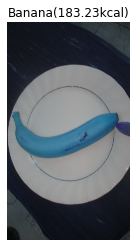

In [10]:
cal=round(calories(result+1,img),2) # tính toán lượng calor

import matplotlib.pyplot as plt
plt.imshow(img)
plt.title('{}({}kcal)'.format(name,cal))
plt.axis('off')
plt.show()